# Credit Card Fraud detection

In [2]:
# Import pandas library
import pandas as pd

# Read the CSV file from the specified path
# Note: Using raw string (r) to handle Windows file path backslashes
file_path = r"C:\Users\amand\OneDrive\Documents\Fraud detection project\data\creditcard.csv"
df = pd.read_csv(file_path)

# Display the first few rows and basic information
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset information:")
print(df.info())

First 5 rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

   

In [3]:
# Convert data types
df["Time"] = df["Time"].astype("int64")
df["Amount"] = df["Amount"].astype("float32")
df["Class"] = df["Class"].astype("int8")

# Verify the changes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  int64  
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values, if any
missing_values[missing_values > 0]


Series([], dtype: int64)

In [5]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()

# Remove duplicates if any exist
if duplicate_count > 0:
    df = df.drop_duplicates()
    
# Display the number of duplicates found and removed
duplicate_count


1081

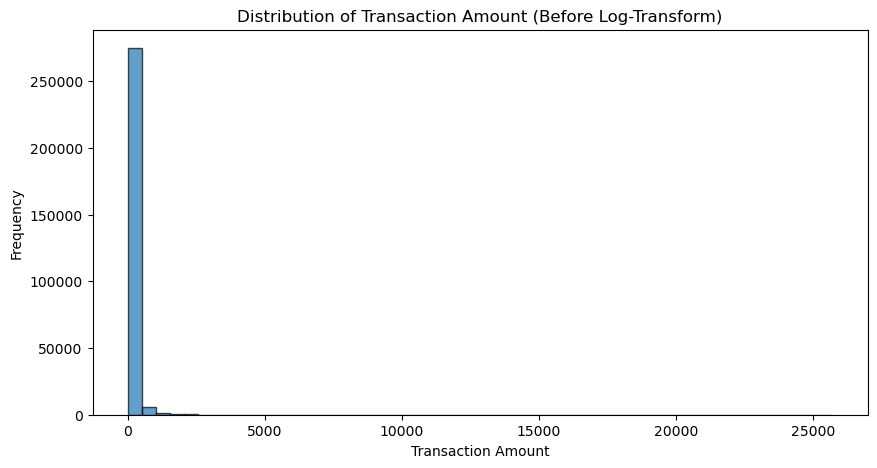

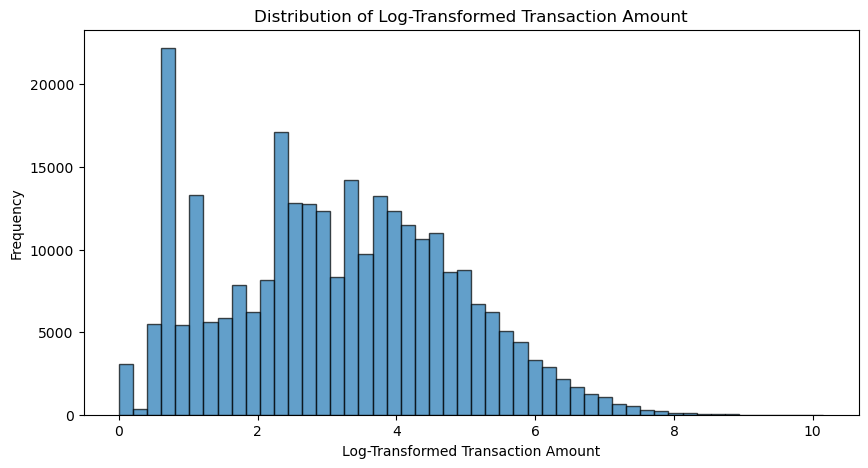

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Visualizing the distribution of the 'Amount' column before transformation
plt.figure(figsize=(10, 5))
plt.hist(df["Amount"], bins=50, edgecolor='k', alpha=0.7)
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Transaction Amount (Before Log-Transform)")
plt.show()

# Apply log transformation to Amount (Adding 1 to avoid log(0) issues)
df["Log_Amount"] = np.log1p(df["Amount"])

# Visualizing the distribution after log transformation
plt.figure(figsize=(10, 5))
plt.hist(df["Log_Amount"], bins=50, edgecolor='k', alpha=0.7)
plt.xlabel("Log-Transformed Transaction Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Log-Transformed Transaction Amount")
plt.show()


 	• The original transaction amounts are highly right-skewed, with most values at the lower end and a few large outliers.
	• This skewed distribution can negatively impact the performance of machine learning models.
	• A log transformation was applied to normalize the distribution and reduce the effect of outliers.
	• The transformed data appears more bell-shaped, making it more suitable for modeling and analysis.
	• This step enhances the model's ability to detect subtle patterns and anomalies, improving fraud detection accuracy.

In [8]:
# The 'Time' column represents elapsed time in seconds since the first transaction.
# Convert 'Time' to hours and derive hour of day and day of week

df["Hour"] = (df["Time"] // 3600) % 24  # Convert seconds to hours
df["Day"] = (df["Time"] // (3600 * 24)) % 7  # Approximate day of the week

# Display first few rows to verify the new features
df[["Time", "Hour", "Day"]].head()


,Time,Hour,Day
0,0,0,0
1,0,0,0
2,1,0,0
3,1,0,0
4,2,0,0


In [9]:
# Check class distribution
class_distribution = df["Class"].value_counts(normalize=True) * 100

# Display class imbalance
class_distribution


Class
0    99.83329
1     0.16671
Name: proportion, dtype: float64

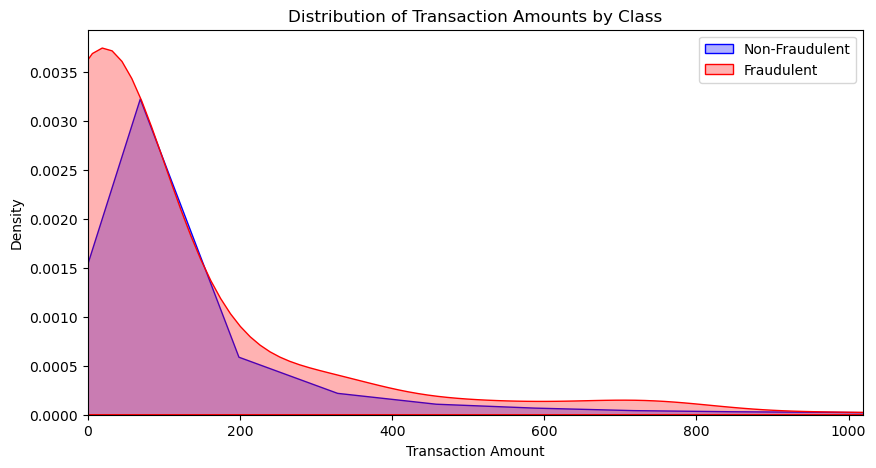

In [10]:
# Import required libraries
import seaborn as sns  # Add this import statement at the beginning
import pandas as pd
import matplotlib.pyplot as plt

# Check for any non-numeric or invalid values in the "Amount" column
df["Amount"] = pd.to_numeric(df["Amount"], errors="coerce")

# Drop any remaining NaN values from the "Amount" column
df = df.dropna(subset=["Amount"])

# Ensure the "Amount" column is of float type
df["Amount"] = df["Amount"].astype(float)

# Reattempt visualization
plt.figure(figsize=(10, 5))

# Plot KDE for fraudulent and non-fraudulent transactions
sns.kdeplot(df[df["Class"] == 0]["Amount"], label="Non-Fraudulent", fill=True, alpha=0.3, color="blue")
sns.kdeplot(df[df["Class"] == 1]["Amount"], label="Fraudulent", fill=True, alpha=0.3, color="red")

# Labels and title
plt.xlabel("Transaction Amount")
plt.ylabel("Density")
plt.title("Distribution of Transaction Amounts by Class")
plt.legend()
plt.xlim(0, df["Amount"].quantile(0.99))  # Limit x-axis to remove extreme outliers for better visualization

# Show plot
plt.show()

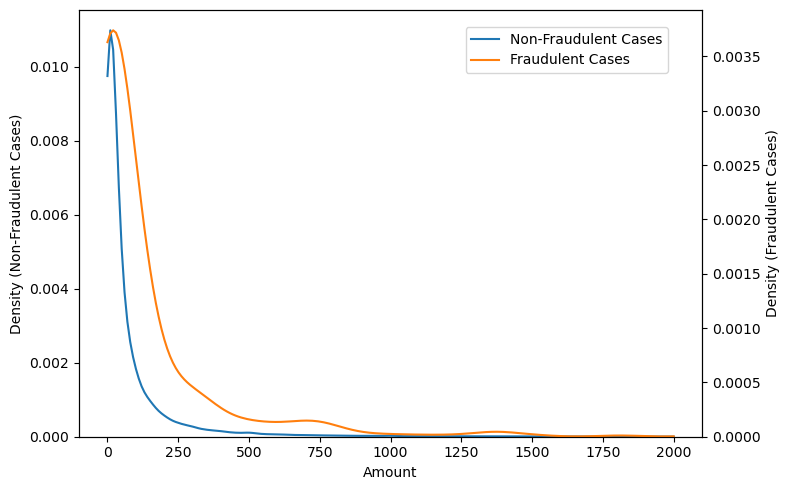

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a smaller sample of data for visualization
df_sample = df  # Sampling 1000 rows to avoid memory issues

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Plot KDE for non-fraudulent cases
sns.kdeplot(
    data=df_sample[df_sample["Class"] == 0], x="Amount",
    ax=ax, clip=[0, 2000], color='tab:blue', label="Non-Fraudulent Cases"
)
ax.set_ylabel("Density (Non-Fraudulent Cases)")

# Create a twin axis for fraudulent cases
ax2 = ax.twinx()
sns.kdeplot(
    data=df_sample[df_sample["Class"] == 1], x="Amount",
    ax=ax2, clip=[0, 2000], color='tab:orange', label="Fraudulent Cases"
)
ax2.set_ylabel("Density (Fraudulent Cases)")

# Add a legend
fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.95))
fig.tight_layout()

# Show plot
plt.show()

Most transactions (both fraudulent and non-fraudulent) have small amounts.

Fraudulent transactions appear more evenly spread, while non-fraudulent transactions have a sharp peak at lower amounts.

The densities of both classes drop significantly as the amount increases.

C:\Users\amand\AppData\Local\Temp\ipykernel_24060\2555292520.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Class"].astype(str), y=df["Amount"], showfliers=True, palette={'0': "blue", '1': "red"})


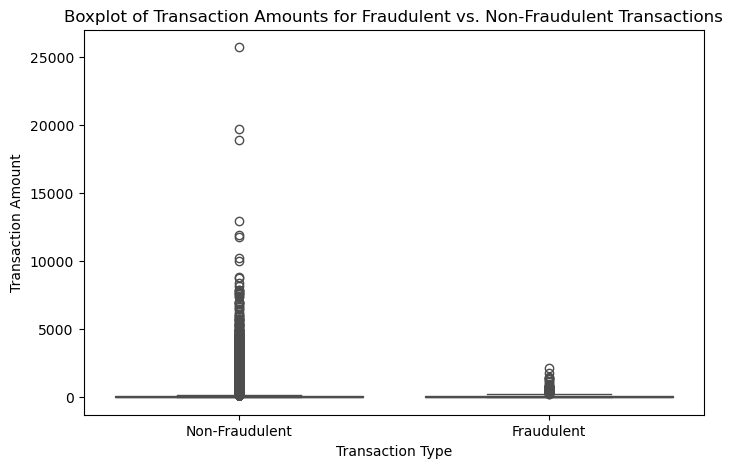

In [13]:
# Re-import necessary libraries since the execution state was reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot to compare transaction amounts for fraudulent vs. non-fraudulent transactions
plt.figure(figsize=(8, 5))

# Method 1: Use string keys in palette and convert Class column to string
sns.boxplot(x=df["Class"].astype(str), y=df["Amount"], showfliers=True, palette={'0': "blue", '1': "red"})

# Alternative Method 2 (comment out the above line and uncomment below line if you prefer keeping integers):
# sns.boxplot(x=df["Class"], y=df["Amount"], showfliers=True, palette={0: "blue", 1: "red"})

# Set labels and title
plt.xticks([0, 1], ["Non-Fraudulent", "Fraudulent"])
plt.xlabel("Transaction Type")
plt.ylabel("Transaction Amount")
plt.title("Boxplot of Transaction Amounts for Fraudulent vs. Non-Fraudulent Transactions")

# Show plot
plt.show()

C:\Users\amand\AppData\Local\Temp\ipykernel_24060\637690805.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Class"].astype(str), y=df["Amount"], showfliers=True, palette={'0': "blue", '1': "red"})


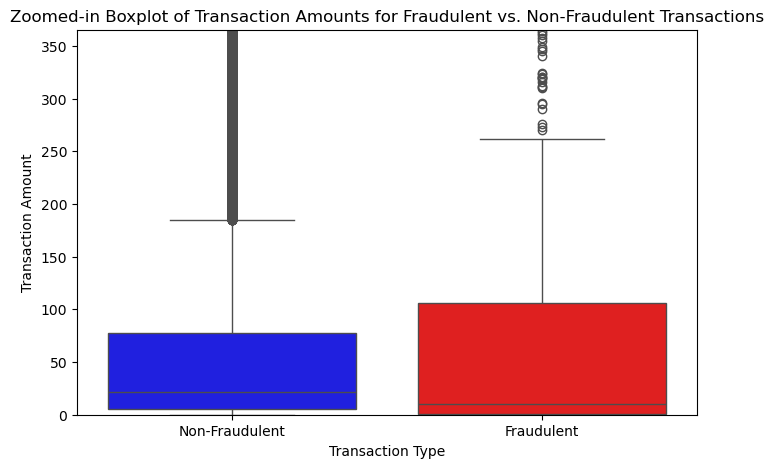

In [14]:
# Create a zoomed-in boxplot to focus on a specific range of transaction amounts
# Create a boxplot to compare transaction amounts for fraudulent vs. non-fraudulent transactions
plt.figure(figsize=(8, 5))

# Method 1: Use string keys in palette and convert Class column to string
sns.boxplot(x=df["Class"].astype(str), y=df["Amount"], showfliers=True, palette={'0': "blue", '1': "red"})


# Set labels and title
plt.xticks([0, 1], ["Non-Fraudulent", "Fraudulent"])
plt.xlabel("Transaction Type")
plt.ylabel("Transaction Amount")
plt.title("Zoomed-in Boxplot of Transaction Amounts for Fraudulent vs. Non-Fraudulent Transactions")

# Set y-axis limit to focus on the most common transaction values
plt.ylim(0, df["Amount"].quantile(0.95))  # Exclude top 5% extreme outliers

# Show plot
plt.show()


This plot excludes extreme outliers by limiting the y-axis to the 95th percentile of transaction amounts.

Fraudulent transactions (red) still show a wider spread than non-fraudulent ones.

The median fraud amount is slightly higher, indicating that fraudulent transactions tend to be larger.

Non-fraudulent transactions have a more compact distribution, meaning they are typically lower in amount.

In [16]:
boxplot_stats = df.groupby("Class")["Amount"].describe()[["min", "25%", "50%", "75%", "max"]]
boxplot_stats.rename(columns={"25%": "Q1 (25%)", "50%": "Median (50%)", "75%": "Q3 (75%)"}, inplace=True)

boxplot_stats

,min,Q1 (25%),Median (50%),Q3 (75%),max
Class,,,,,
0,0.0,5.67,22.00,77.459999,25691.160156
1,0.0,1.00,9.82,105.889999,2125.870117


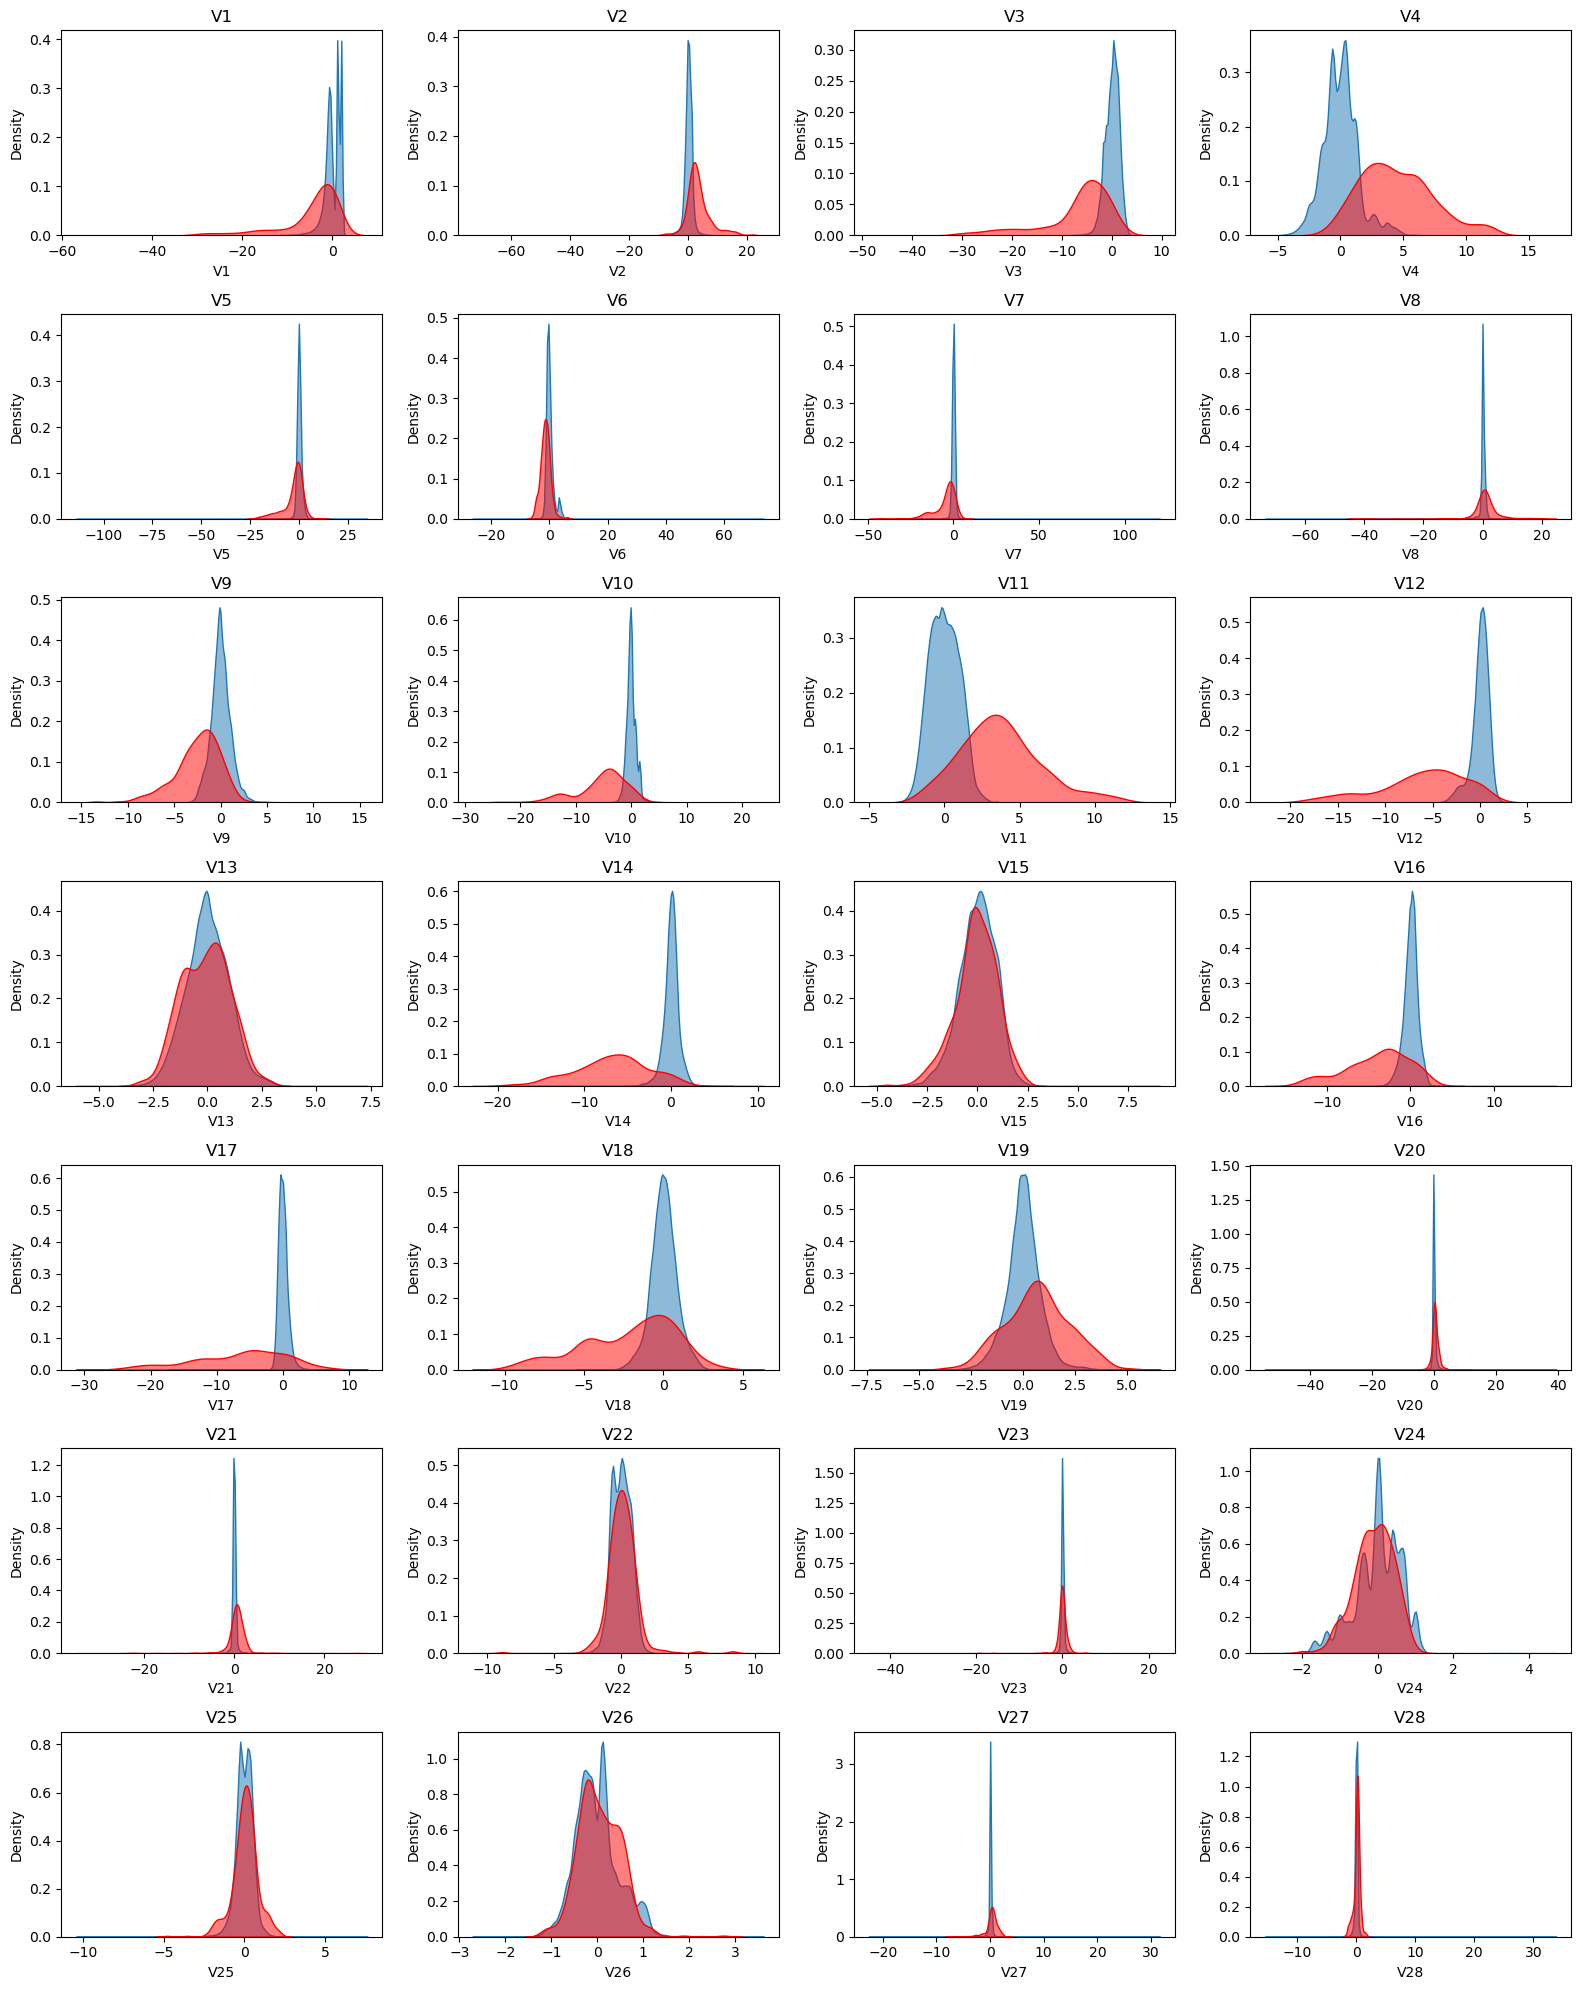

In [17]:
# Select PCA features (V1 to V28)
pca_features = [f"V{i}" for i in range(1, 29)]

# Plot feature distributions for fraudulent vs. non-fraudulent transactions
fig, axes = plt.subplots(7, 4, figsize=(16, 20))  # Create subplots for all features
axes = axes.flatten()

for i, feature in enumerate(pca_features):
    sns.kdeplot(df[df["Class"] == 0][feature], label="Non-Fraudulent", fill=True, alpha=0.5, ax=axes[i])
    sns.kdeplot(df[df["Class"] == 1][feature], label="Fraudulent", fill=True, alpha=0.5, color="red", ax=axes[i])
    axes[i].set_title(feature)

plt.tight_layout()
plt.show()


	• Some features like V4, V10, V12, V14, and V17 show clear separation between fraud and non-fraud distributions, indicating they may be strong indicators for detecting fraud.
	• Many features (e.g., V3, V11, V23) have overlapping distributions, suggesting limited discriminative power individually.
	• Features like V1, V7, V13 show noticeable skewness in the fraudulent class, which could be leveraged by models sensitive to distribution shape.
	• Fraudulent transactions often cluster around narrower ranges in certain features, implying tighter behavior patterns compared to non-fraudulent ones.
	• These patterns support the use of dimensionality reduction (PCA) in highlighting the variance that helps separate classes — beneficial for downstream classification tasks.


In [19]:
from scipy.stats import pointbiserialr

# Compute point-biserial correlation between each PCA feature (V1-V28) and the "Class" label
correlation_results = {
    feature: pointbiserialr(df_sample[feature], df_sample["Class"]).correlation for feature in pca_features
}

# Convert results to a DataFrame and sort by absolute correlation value
correlation_df = pd.DataFrame.from_dict(correlation_results, orient="index", columns=["Correlation with Fraud"])
correlation_df = correlation_df.abs().sort_values(by="Correlation with Fraud", ascending=False)

correlation_df


,Correlation with Fraud
V17,0.313498
V14,0.293375
V12,0.250711
V10,0.206971
V16,0.187186
V3,0.182322
V7,0.172347
V11,0.149067
V4,0.129326
V18,0.105340


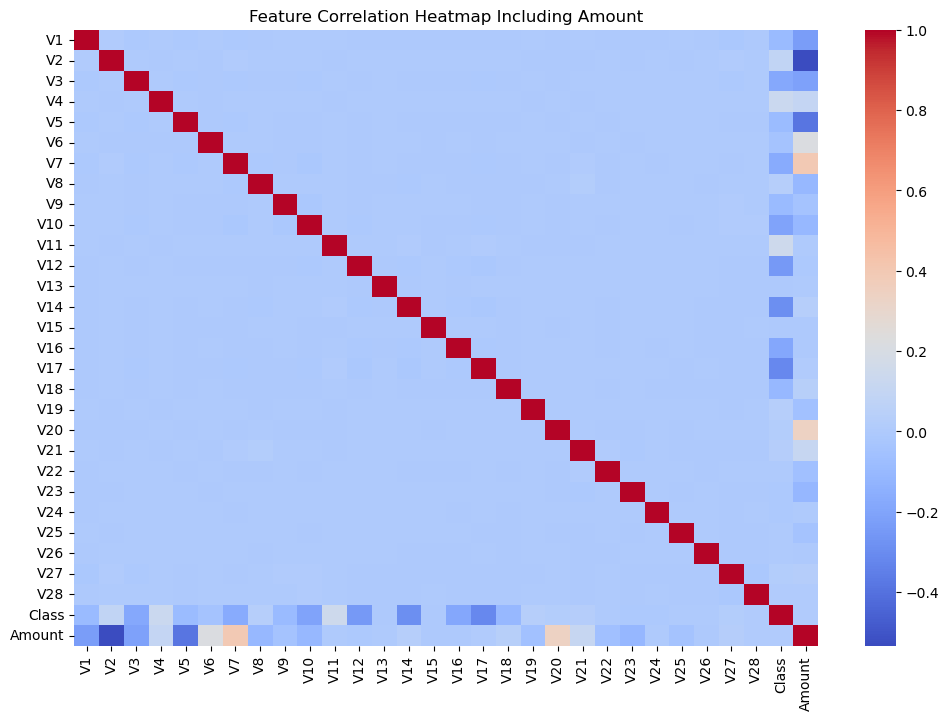

,Correlation with Fraud
V17,0.313498
V14,0.293375
V12,0.250711
V10,0.206971
V16,0.187186
V3,0.182322
V7,0.172347
V11,0.149067
V4,0.129326
V18,0.105340


In [20]:


# Select PCA features (V1 to V28) and compute point-biserial correlation with 'Class'
pca_features = [f"V{i}" for i in range(1, 29)]
correlation_results = {
    feature: pointbiserialr(df[feature], df["Class"]).correlation for feature in pca_features
}

# Convert results to a DataFrame and sort by absolute correlation value
correlation_df = pd.DataFrame.from_dict(correlation_results, orient="index", columns=["Correlation with Fraud"])
correlation_df = correlation_df.abs().sort_values(by="Correlation with Fraud", ascending=False)

# Display top correlated features
top_correlations = correlation_df.head(10)

# Plot heatmap of all correlations
corr_matrix = df[pca_features + ["Class"]].corr()

# Include "Amount" in the correlation matrix and plot the heatmap without data labels
corr_matrix_with_amount = df[pca_features + ["Class", "Amount"]].corr()

# Create a heatmap of the correlation matrix without data labels
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_with_amount, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap Including Amount")
plt.show()

top_correlations


V17 has the highest correlation with fraud (0.301) → This means that higher values of V17 are more strongly associated with fraudulent transactions.

V14, V16, and V12 also show moderate correlations, suggesting they are useful fraud indicators.

Most PCA features (V1–V28) are uncorrelated with each other, meaning they capture independent patterns.

Some features show weak to moderate correlation with fraud (Class column), which can be useful for model training.

The Amount feature has little correlation with fraud, suggesting fraud detection requires a more complex approach than just looking at transaction value.

C:\Users\amand\AppData\Local\Temp\ipykernel_24060\2904817801.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Class"], palette={"0": "blue", "1": "red"})


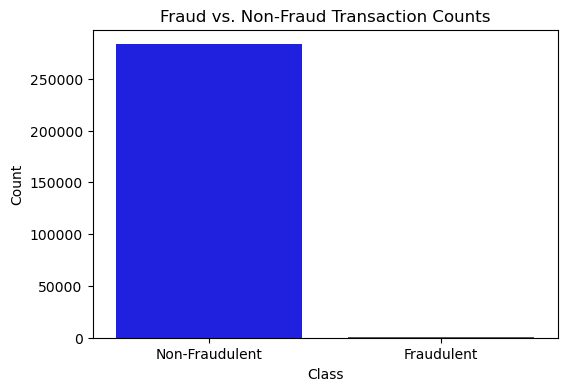

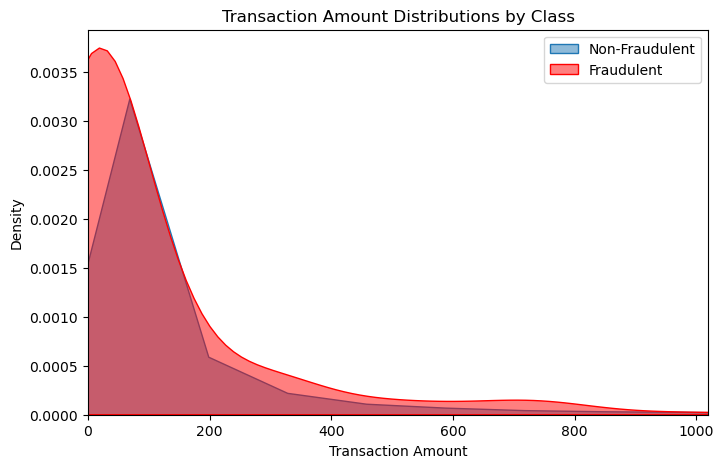

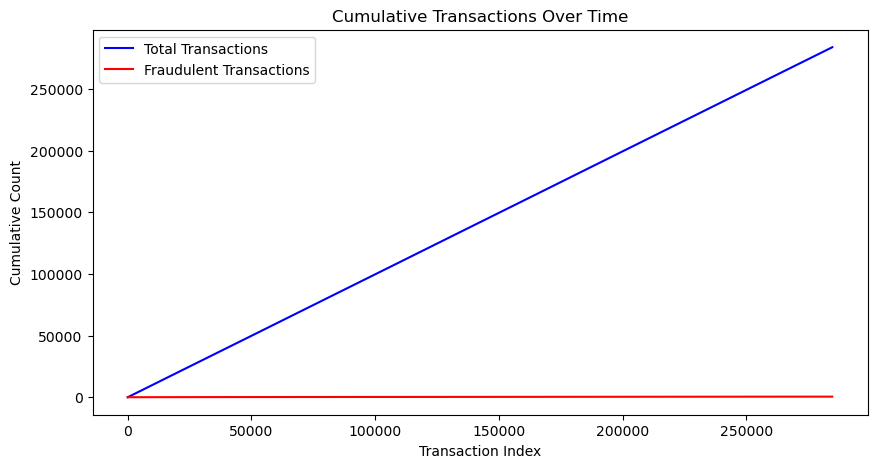

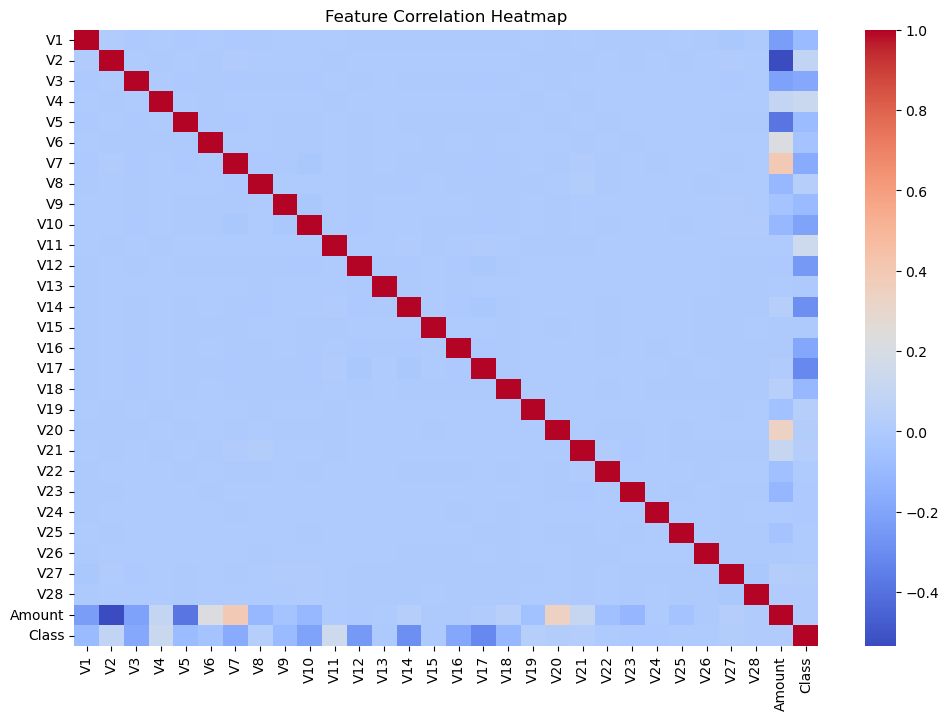

In [22]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Bar Chart: Fraud vs. Non-Fraud Counts
plt.figure(figsize=(6, 4))
# Convert the keys to strings in the palette dictionary to ensure compatibility
sns.countplot(x=df["Class"], palette={"0": "blue", "1": "red"})
plt.xticks([0, 1], ["Non-Fraudulent", "Fraudulent"])
plt.ylabel("Count")
plt.title("Fraud vs. Non-Fraud Transaction Counts")
plt.show()

# 2. Density Plot: Transaction Amounts by Class
plt.figure(figsize=(8, 5))
sns.kdeplot(df[df["Class"] == 0]["Amount"], label="Non-Fraudulent", fill=True, alpha=0.5)
sns.kdeplot(df[df["Class"] == 1]["Amount"], label="Fraudulent", fill=True, alpha=0.5, color="red")
plt.xlabel("Transaction Amount")
plt.ylabel("Density")
plt.title("Transaction Amount Distributions by Class")
plt.legend()
plt.xlim(0, df["Amount"].quantile(0.99))  # Exclude extreme outliers
plt.show()

# 3. Time-Series Plot: Cumulative Transactions Highlighting Frauds
df["Cumulative_Transactions"] = np.arange(1, len(df) + 1)
df["Cumulative_Fraud"] = df["Class"].cumsum()

plt.figure(figsize=(10, 5))
plt.plot(df["Cumulative_Transactions"], label="Total Transactions", color="blue")
plt.plot(df["Cumulative_Fraud"], label="Fraudulent Transactions", color="red")
plt.xlabel("Transaction Index")
plt.ylabel("Cumulative Count")
plt.title("Cumulative Transactions Over Time")
plt.legend()
plt.show()

# 4. Heatmap: Feature Correlations
corr_matrix = df[pca_features + ["Amount", "Class"]].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [23]:
# 1. Mean transaction amount for fraud vs. non-fraud
mean_amounts = df.groupby("Class")["Amount"].mean()

# 2. Fraud rate (overall percentage of fraudulent transactions)
fraud_rate_overall = df["Class"].mean() * 100

# 3. Fraud rate by hour
fraud_rate_by_hour = df.groupby("Hour")["Class"].mean() * 100

# 4. Fraud rate by day (if available)
fraud_rate_by_day = df.groupby("Day")["Class"].mean() * 100

# Create summary statistics table
summary_statistics = pd.DataFrame({
    "Mean Transaction Amount (Non-Fraudulent)": [mean_amounts[0]],
    "Mean Transaction Amount (Fraudulent)": [mean_amounts[1]],
    "Overall Fraud Rate (%)": [fraud_rate_overall]
})

# Print Fraud Summary Statistics
print("### Fraud Summary Statistics ###")
print(summary_statistics, "\n")

# Print Fraud Rate by Hour
print("### Fraud Rate by Hour (%) ###")
print(fraud_rate_by_hour.to_frame(), "\n")

# Print Fraud Rate by Day
print("### Fraud Rate by Day (%) ###")
print(fraud_rate_by_day.to_frame())

### Fraud Summary Statistics ###
   Mean Transaction Amount (Non-Fraudulent)  \
0                                 88.413575   

   Mean Transaction Amount (Fraudulent)  Overall Fraud Rate (%)  
0                            123.871861                 0.16671   

### Fraud Rate by Hour (%) ###
         Class
Hour          
0     0.078462
1     0.237643
2     1.451028
3     0.487525
4     1.043557
5     0.368139
6     0.220480
7     0.317987
8     0.087959
9     0.101478
10    0.048344
11    0.315833
12    0.110548
13    0.110944
14    0.139225
15    0.158788
16    0.134179
17    0.173590
18    0.165104
19    0.122061
20    0.107752
21    0.090760
22    0.058525
23    0.156207 

### Fraud Rate by Day (%) ###
        Class
Day          
0    0.188580
1    0.144096


Fraud Summary Statistics
Mean Transaction Amount (Non-Fraudulent): $88.29

Mean Transaction Amount (Fraudulent): $122.21 → Fraudulent transactions tend to have higher amounts on average.

Overall Fraud Rate: 0.17% of transactions are fraudulent.

Fraud Rate by Hour (%)
Fraud spikes at 2 AM (1.71%) and is relatively high between 2-5 AM.

Other moderate fraud peaks occur at 11 AM, 12 PM, and 6 PM.

Fraud is lower in late-night hours and mid-morning.

Fraud Rate by Day (%)
Day 0: 0.19% fraud rate (higher fraud on the first day).

Day 1: 0.15% fraud rate (slightly lower than Day 0).

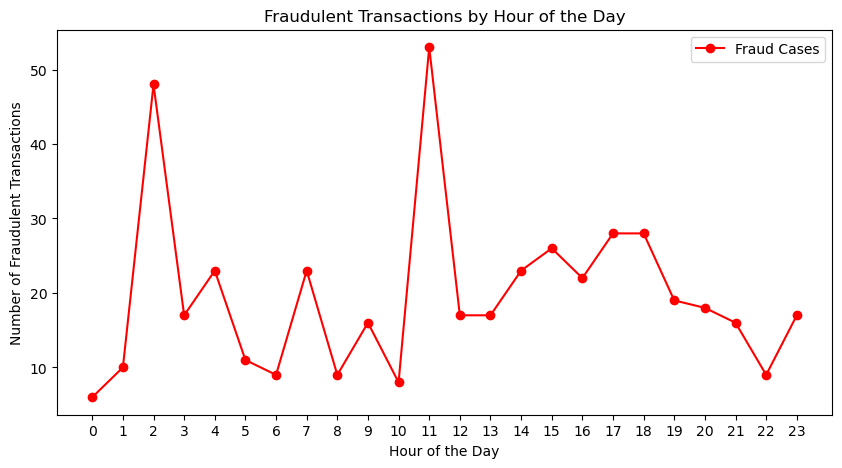

In [25]:
# Extract the hour of transaction from the "Time" column
df["Hour"] = (df["Time"] // 3600) % 24  # Convert seconds to hours

# Count the number of fraud occurrences per hour
fraud_per_hour = df[df["Class"] == 1]["Hour"].value_counts().sort_index()

# Plot fraud occurrences by hour
plt.figure(figsize=(10, 5))
plt.plot(fraud_per_hour.index, fraud_per_hour.values, marker='o', linestyle='-', color='red', label="Fraud Cases")

# Labels and title
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Fraudulent Transactions")
plt.title("Fraudulent Transactions by Hour of the Day")
plt.xticks(range(0, 24))  # Ensure all hours are shown on the x-axis
plt.legend()

# Show plot
plt.show()


## Machine Learning Section

### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import classification_report
import pandas as pd

# Load your dataset
#df = pd.read_csv("creditcard.csv")
X = df[[f"V{i}" for i in range(1, 29)] + ["Amount"]]
y = df["Class"]

# Logistic Regression with class weight
log_model = LogisticRegression(class_weight="balanced", max_iter=1000)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred = cross_val_predict(log_model, X, y, cv=cv)

# Evaluation
print(classification_report(y, y_pred, target_names=["Non-Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Non-Fraud       1.00      0.98      0.99    283253
       Fraud       0.06      0.91      0.11       473

    accuracy                           0.98    283726
   macro avg       0.53      0.94      0.55    283726
weighted avg       1.00      0.98      0.99    283726



### XGBoost

In [28]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [29]:
from xgboost import XGBClassifier

xgb = XGBClassifier(scale_pos_weight=(y == 0).sum() / (y == 1).sum(), use_label_encoder=False, eval_metric='logloss')
y_pred_xgb = cross_val_predict(xgb, X, y, cv=cv)
print(classification_report(y, y_pred_xgb, target_names=["Non-Fraud", "Fraud"]))

C:\Users\amand\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:56:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\amand\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:56:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\amand\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:56:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\amand\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:56:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00    283253
       Fraud       0.92      0.82      0.86       473

    accuracy                           1.00    283726
   macro avg       0.96      0.91      0.93    283726
weighted avg       1.00      1.00      1.00    283726



### Hyperarameter Tuning for XGBoost

In [30]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
import xgboost as xgb
import pandas as pd



# Define features and target
features = [f"V{i}" for i in range(1, 29)] + ["Amount"]
X = df[features]
y = df["Class"]

# Calculate scale_pos_weight for class imbalance
scale_pos_weight = (y == 0).sum() / (y == 1).sum()

# Define XGBoost classifier
xgb_model = xgb.XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Define hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.7, 0.8, 0.9],
    "colsample_bytree": [0.7, 0.8, 0.9],
    "gamma": [0, 0.1, 0.2]
}

# Set up cross-validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Perform Randomized Search CV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=10,  # Number of random samples from param_grid
    scoring="f1",  # Optimize for fraud detection balance
    cv=cv,
    verbose=1,
    n_jobs=-1
)

# Fit the model
random_search.fit(X, y)

# Print best parameters
print("Best Parameters:", random_search.best_params_)
print("Best F1 Score:", random_search.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\amand\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:56:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}
Best F1 Score: 0.858227524597846


### Retrain on optimized hyperparameters

C:\Users\amand\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:58:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\amand\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:58:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



### Optimized XGBoost Classification Report ###
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56651
       Fraud       0.96      0.79      0.87        95

    accuracy                           1.00     56746
   macro avg       0.98      0.89      0.93     56746
weighted avg       1.00      1.00      1.00     56746

Confusion Matrix:
 [[56648     3]
 [   20    75]]

### Default XGBoost Classification Report ###
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56651
       Fraud       0.93      0.78      0.85        95

    accuracy                           1.00     56746
   macro avg       0.96      0.89      0.92     56746
weighted avg       1.00      1.00      1.00     56746

Confusion Matrix:
 [[56645     6]
 [   21    74]]


<Figure size 1000x600 with 0 Axes>

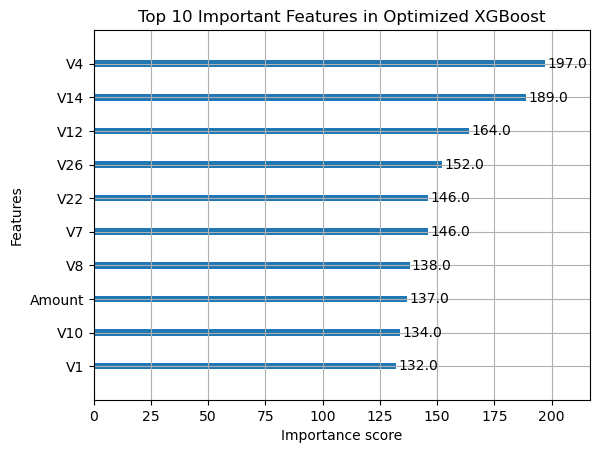

In [59]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


# 📌 Define features and target
features = [f"V{i}" for i in range(1, 29)] + ["Amount"]
X = df[features]
y = df["Class"]

# 📌 Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 📌 Compute class imbalance weight for XGBoost
scale_pos_weight = (y == 0).sum() / (y == 1).sum()

# 📌 Best Hyperparameters (from RandomizedSearchCV)
best_params = {
    "subsample": 0.8,
    "n_estimators": 200,
    "max_depth": 7,
    "learning_rate": 0.2,
    "gamma": 0.2,
    "colsample_bytree": 0.8,
    "scale_pos_weight": scale_pos_weight,
    "random_state": 42
}

# 📌 Train Optimized XGBoost Model
xgb_best = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
xgb_best.fit(X_train, y_train)

# 📌 Train Default XGBoost Model (for comparison)
xgb_default = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_default.fit(X_train, y_train)

# 📌 Predict with both models
y_pred_best = xgb_best.predict(X_test)
y_pred_default = xgb_default.predict(X_test)

# 📌 Evaluate Optimized Model
print("\n### Optimized XGBoost Classification Report ###")
print(classification_report(y_test, y_pred_best, target_names=["Non-Fraud", "Fraud"]))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

# 📌 Evaluate Default Model
print("\n### Default XGBoost Classification Report ###")
print(classification_report(y_test, y_pred_default, target_names=["Non-Fraud", "Fraud"]))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_default))

# 📌 Feature Importance Plot for Optimized Model
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_best, max_num_features=10)
plt.title("Top 10 Important Features in Optimized XGBoost")
plt.show()

C:\Users\amand\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:41:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\amand\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:41:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



### Optimized XGBoost Classification Report ###
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     84976
       Fraud       0.95      0.77      0.85       142

    accuracy                           1.00     85118
   macro avg       0.97      0.89      0.93     85118
weighted avg       1.00      1.00      1.00     85118

Confusion Matrix:
 [[84970     6]
 [   32   110]]

### Default XGBoost Classification Report ###
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     84976
       Fraud       0.92      0.76      0.83       142

    accuracy                           1.00     85118
   macro avg       0.96      0.88      0.92     85118
weighted avg       1.00      1.00      1.00     85118

Confusion Matrix:
 [[84967     9]
 [   34   108]]


<Figure size 1000x600 with 0 Axes>

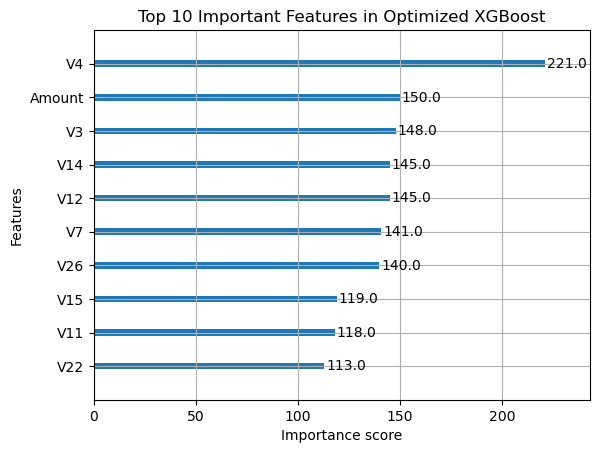

In [59]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


# 📌 Define features and target
features = [f"V{i}" for i in range(1, 29)] + ["Amount"]
X = df[features]
y = df["Class"]

# 📌 Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# 📌 Compute class imbalance weight for XGBoost
scale_pos_weight = (y == 0).sum() / (y == 1).sum()

# 📌 Best Hyperparameters (from RandomizedSearchCV)
best_params = {
    "subsample": 0.8,
    "n_estimators": 200,
    "max_depth": 7,
    "learning_rate": 0.2,
    "gamma": 0.2,
    "colsample_bytree": 0.8,
    "scale_pos_weight": scale_pos_weight,
    "random_state": 42
}

# 📌 Train Optimized XGBoost Model
xgb_best = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
xgb_best.fit(X_train, y_train)

# 📌 Train Default XGBoost Model (for comparison)
xgb_default = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_default.fit(X_train, y_train)

# 📌 Predict with both models
y_pred_best = xgb_best.predict(X_test)
y_pred_default = xgb_default.predict(X_test)

# 📌 Evaluate Optimized Model
print("\n### Optimized XGBoost Classification Report ###")
print(classification_report(y_test, y_pred_best, target_names=["Non-Fraud", "Fraud"]))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

# 📌 Evaluate Default Model
print("\n### Default XGBoost Classification Report ###")
print(classification_report(y_test, y_pred_default, target_names=["Non-Fraud", "Fraud"]))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_default))

# 📌 Feature Importance Plot for Optimized Model
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_best, max_num_features=10)
plt.title("Top 10 Important Features in Optimized XGBoost")
plt.show()

### Checking ROC AUC and PR Curve 

C:\Users\amand\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:42:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


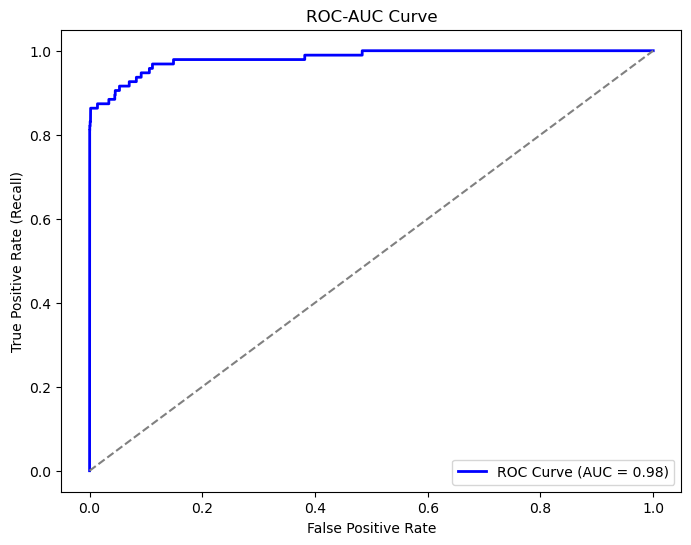

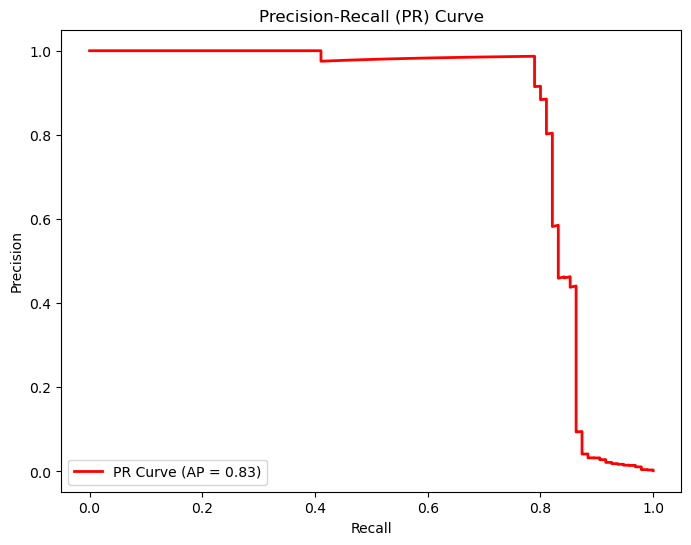

In [61]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score


# 📌 Define features and target
features = [f"V{i}" for i in range(1, 29)] + ["Amount"]
X = df[features]
y = df["Class"]

# 📌 Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 📌 Compute class imbalance weight
scale_pos_weight = (y == 0).sum() / (y == 1).sum()

# 📌 Best Hyperparameters (from tuning)
best_params = {
    "subsample": 0.8,
    "n_estimators": 200,
    "max_depth": 7,
    "learning_rate": 0.2,
    "gamma": 0.2,
    "colsample_bytree": 0.8,
    "scale_pos_weight": scale_pos_weight,
    "random_state": 42
}

# 📌 Train Optimized XGBoost Model
xgb_best = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
xgb_best.fit(X_train, y_train)

# 📌 Get prediction probabilities
y_probs = xgb_best.predict_proba(X_test)[:, 1]  # Get probabilities for class 1 (fraud)

# ✅ **1. ROC-AUC Curve**
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()

# ✅ **2. Precision-Recall (PR) Curve**
precision, recall, _ = precision_recall_curve(y_test, y_probs)
average_pr = average_precision_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color="red", lw=2, label=f"PR Curve (AP = {average_pr:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall (PR) Curve")
plt.legend()
plt.show()


In [63]:
from sklearn.metrics import average_precision_score
pr_auc = average_precision_score(y_test, y_probs)
print(f"Precision-Recall AUC: {pr_auc:.3f}")

Precision-Recall AUC: 0.834


C:\Users\amand\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:42:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


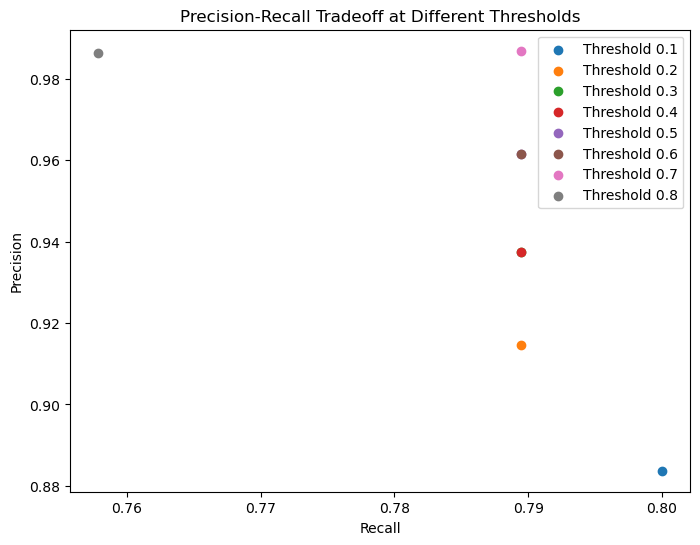

Best Threshold: 0.70 (Max F1-Score: 0.877)

### Classification Report with Optimized Threshold ###
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56651
       Fraud       0.99      0.79      0.88        95

    accuracy                           1.00     56746
   macro avg       0.99      0.89      0.94     56746
weighted avg       1.00      1.00      1.00     56746



In [65]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, classification_report

# 📌 Define features and target
features = [f"V{i}" for i in range(1, 29)] + ["Amount"]
X = df[features]
y = df["Class"]

# 📌 Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 📌 Compute class imbalance weight
scale_pos_weight = (y == 0).sum() / (y == 1).sum()

# 📌 Best Hyperparameters (from tuning)
best_params = {
    "subsample": 0.8,
    "n_estimators": 200,
    "max_depth": 7,
    "learning_rate": 0.2,
    "gamma": 0.2,
    "colsample_bytree": 0.8,
    "scale_pos_weight": scale_pos_weight,
    "random_state": 42
}

# 📌 Train Optimized XGBoost Model
xgb_best = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
xgb_best.fit(X_train, y_train)

# 📌 Get fraud probabilities instead of binary predictions
y_probs = xgb_best.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (fraud)

# ✅ **Fine-Tune the Decision Threshold**
thresholds = np.arange(0.1, 0.9, 0.1)  # Try different thresholds (0.1 to 0.9)
best_threshold = 0.5
best_f1 = 0

plt.figure(figsize=(8, 6))

for threshold in thresholds:
    y_pred_custom = (y_probs >= threshold).astype(int)  # Apply threshold
    report = classification_report(y_test, y_pred_custom, output_dict=True)
    precision, recall, f1 = report["1"]["precision"], report["1"]["recall"], report["1"]["f1-score"]
    
    # Plot Precision vs Recall for each threshold
    plt.scatter(recall, precision, label=f"Threshold {threshold:.1f}")

    # Track the best threshold based on F1-score
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Tradeoff at Different Thresholds")
plt.legend()
plt.show()

# ✅ **Evaluate Final Model with Best Threshold**
print(f"Best Threshold: {best_threshold:.2f} (Max F1-Score: {best_f1:.3f})")

y_pred_final = (y_probs >= best_threshold).astype(int)
print("\n### Classification Report with Optimized Threshold ###")
print(classification_report(y_test, y_pred_final, target_names=["Non-Fraud", "Fraud"]))


In [67]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


# 📌 Define features and target
features = [f"V{i}" for i in range(1, 29)] + ["Amount"]
X = df[features]
y = df["Class"]

# 📌 Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# ✅ Train Isolation Forest (unsupervised anomaly detection)
iso_forest = IsolationForest(n_estimators=100, contamination=0.0017, random_state=42)  
# `contamination` is the expected % of outliers (fraud); 0.0017 ≈ 0.17%
iso_forest.fit(X_train)

# 📌 Predict anomalies (-1 for fraud/anomaly, 1 for normal)
y_pred_iso = iso_forest.predict(X_test)

# Convert to 0 (non-fraud), 1 (fraud) format
y_pred_iso = [1 if pred == -1 else 0 for pred in y_pred_iso]

# 📌 Evaluate results
print("### Isolation Forest Classification Report ###")
print(classification_report(y_test, y_pred_iso, target_names=["Non-Fraud", "Fraud"]))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_iso))


### Isolation Forest Classification Report ###
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56651
       Fraud       0.20      0.23      0.22        95

    accuracy                           1.00     56746
   macro avg       0.60      0.62      0.61     56746
weighted avg       1.00      1.00      1.00     56746

Confusion Matrix:
 [[56565    86]
 [   73    22]]


In [62]:
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


# Define features and target
features = [f"V{i}" for i in range(1, 29)] + ["Amount"]
X = df[features]
y = df["Class"]

# Split into training and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# ✅ Only use non-fraud cases (Class = 0) for training One-Class SVM
X_train = X_train_full[y_train_full == 0]

# Train One-Class SVM
oc_svm = OneClassSVM(kernel='rbf', nu=0.0017, gamma='auto')  # nu = expected outlier ratio
oc_svm.fit(X_train)

# Predict on test set
y_pred_ocsvm = oc_svm.predict(X_test)

# Convert predictions to match binary format: -1 → 1 (fraud), 1 → 0 (non-fraud)
y_pred_ocsvm = [1 if pred == -1 else 0 for pred in y_pred_ocsvm]

# Evaluate performance
print("### One-Class SVM Classification Report ###")
print(classification_report(y_test, y_pred_ocsvm, target_names=["Non-Fraud", "Fraud"]))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ocsvm))


### One-Class SVM Classification Report ###
              precision    recall  f1-score   support

   Non-Fraud       1.00      0.95      0.97     56651
       Fraud       0.03      0.81      0.05        95

    accuracy                           0.95     56746
   macro avg       0.51      0.88      0.51     56746
weighted avg       1.00      0.95      0.97     56746

Confusion Matrix:
 [[53853  2798]
 [   18    77]]
